# Life Expectancy Prediction Using Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [46]:
bmi_life_data=pd.read_csv('bmi_and_life_expectancy.csv')
bmi_life_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


#### Make and fit the linear regression model

In [47]:
# Fit the model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

LinearRegression()

#### Make the prediction using model

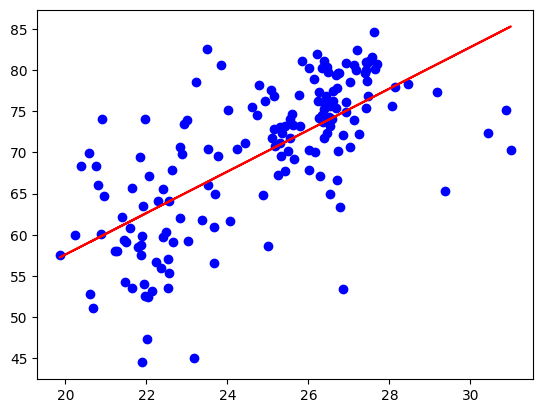

In [51]:
# draw the learning curve
plt.plot(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']], 'bo')
plt.plot(bmi_life_data[['BMI']], bmi_life_model.predict(bmi_life_data[['BMI']]), color='red')
plt.show()

In [55]:
# Predict life expectancy for a BMI value of 21.07931
bmi_value = 21.07931
laos_life_exp = bmi_life_model.predict([[bmi_value]])  # Reshape to 2D array

print(f"Predicted life expectancy for BMI of {bmi_value} is : {laos_life_exp[0][0]}")

Predicted life expectancy for BMI of 21.07931 is : 60.315647163993056


### Result:
Predicted life expectancy for BMI of 21.07931 is : 60.315647163993056

# Diabetes prediction using linear regression

### Part 1: Load Data and Preprocess

In [80]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Create a DataFrame for easier manipulation and visualization
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Define feature and target variables
feature = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
target = 'target'

# Separate features and target variable
X = df[feature]
y = df[target]

# Generate polynomial and interaction features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

print("Data Preprocessing Completed")


Data Preprocessing Completed


### Part 2: Split Data and Train the Model

In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Ridge regression model with cross-validation
ridge_model = Ridge()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print("Best alpha parameter:", grid_search.best_params_['alpha'])
print("Mean Squared Error:", mse)


Best alpha parameter: 100.0
Mean Squared Error: 2658.0732748552937


### Part 3: Plot Learning Curve


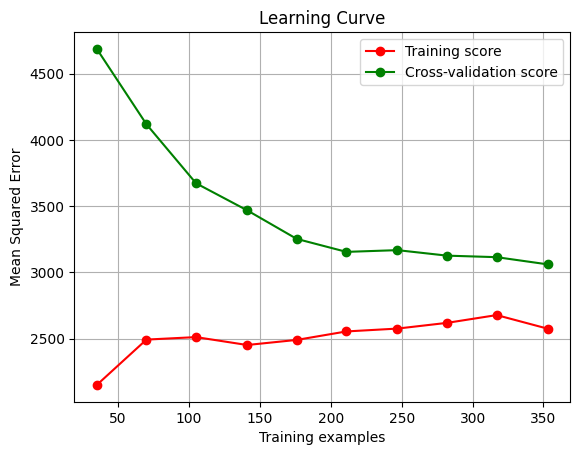

In [82]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Plotting Learning Curves
train_sizes, train_scores, test_scores = learning_curve(best_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()


### Part 4: Plot Model Complexity Curve

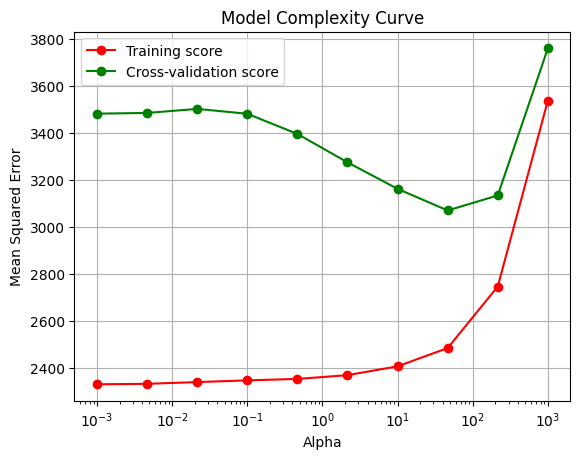

In [83]:
from sklearn.model_selection import validation_curve

# Plotting Model Complexity Curve
param_range = np.logspace(-3, 3, 10)
train_scores, test_scores = validation_curve(Ridge(), X_scaled, y, param_name='alpha', param_range=param_range, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure()
plt.semilogx(param_range, train_scores_mean, 'o-', color='r', label='Training score')
plt.semilogx(param_range, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Model Complexity Curve')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()


In [92]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1
weight2 = 3
bias = 1.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

You got 3 wrong.  Keep trying!

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   1.0                    1           No
       0          1                   4.0                    1           No
       1          0                   2.0                    1           No
       1          1                   5.0                    1          Yes


In [93]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1
weight2 = 3
bias = 1.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, True, True, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

You got 1 wrong.  Keep trying!

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   1.0                    1           No
       0          1                   4.0                    1          Yes
       1          0                   2.0                    1          Yes
       1          1                   5.0                    1          Yes


In [95]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1
weight2 = 3
bias = 1.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, True, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

You got 2 wrong.  Keep trying!

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   1.0                    1           No
       0          1                   4.0                    1          Yes
       1          0                   2.0                    1          Yes
       1          1                   5.0                    1           No
